<a href="https://colab.research.google.com/github/santule/ERA/blob/main/S8/Session8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)
%cd /content/drive/MyDrive/AI/ERA/session8

Mounted at /content/drive/
/content/drive/MyDrive/AI/ERA/session8


In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import model # model.py file
import numpy as np

###### 1 - LOAD DATA

In [3]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                      #transforms.ColorJitter(brightness=0.40, contrast=0.4, saturation=0.40, hue=0.1),
                                      #transforms.RandomAffine(degrees=7, shear=10, translate=(0.1, 0.1), scale=(0.8, 1.2)),
                                      transforms.RandomHorizontalFlip(p = 0.3),
                                      transforms.RandomRotation(10),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.49139968,0.48215841,0.44653091), (0.24703223,0.24348513,0.26158784)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.49139968,0.48215841,0.44653091), (0.24703223,0.24348513,0.26158784))
                                       ])


In [4]:
train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


###### 2 - CHECK THE MODEL

In [6]:
#!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model_check = model.Net(norm="LN").to(device)
summary(model_check, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             216
              ReLU-2            [-1, 8, 32, 32]               0
         GroupNorm-3            [-1, 8, 32, 32]              16
           Dropout-4            [-1, 8, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           1,152
              ReLU-6           [-1, 16, 32, 32]               0
         GroupNorm-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9            [-1, 8, 32, 32]             128
        MaxPool2d-10            [-1, 8, 16, 16]               0
           Conv2d-11           [-1, 32, 16, 16]             256
           Conv2d-12           [-1, 16, 16, 16]           1,152
             ReLU-13           [-1, 16, 16, 16]               0
        GroupNorm-14           [-1, 16,

###### 3 - TRAINING THE DIFFERENT MODELS

###### 3.1 BATCH NORM

In [7]:
train_losses = []
test_losses = []
train_acc_list = []
test_acc_list = []

model_bn =  model.Net(norm="BN").to(device)
optimizer = optim.SGD(model_bn.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_loss,train_acc = model.train(model_bn, device, train_loader, optimizer, epoch)
    train_losses.append(train_loss)
    train_acc_list.append(train_acc)


    test_loss,test_acc = model.test_accuracy = model.test(model_bn, device, test_loader)
    test_losses.append(test_loss)
    test_acc_list.append(test_acc)

EPOCH: 0


100%|██████████| 391/391 [00:22<00:00, 17.30it/s]

Training set set: Average loss: 1.6804, Accuracy: 18502/50000 (37.00%)



Test set: Average loss: 1.5716, Accuracy: 4304/10000 (43.04%)

EPOCH: 1


100%|██████████| 391/391 [00:20<00:00, 18.89it/s]

Training set set: Average loss: 1.3070, Accuracy: 25839/50000 (51.68%)



Test set: Average loss: 1.2716, Accuracy: 5491/10000 (54.91%)

EPOCH: 2


100%|██████████| 391/391 [00:21<00:00, 17.93it/s]

Training set set: Average loss: 1.1629, Accuracy: 28864/50000 (57.73%)



Test set: Average loss: 1.2375, Accuracy: 5491/10000 (54.91%)

EPOCH: 3


100%|██████████| 391/391 [00:22<00:00, 17.34it/s]

Training set set: Average loss: 1.0786, Accuracy: 30446/50000 (60.89%)



Test set: Average loss: 1.0761, Accuracy: 6153/10000 (61.53%)

EPOCH: 4


100%|██████████| 391/391 [00:22<00:00, 17.31it/s]

Training set set: Average loss: 1.0244, Accuracy: 31572/50000 (63.14%)



Test set: Average loss: 1.0120, Accuracy: 6436/10000 (64.36%)

EPOCH: 5


100%|██████████| 391/391 [00:22<00:00, 17.13it/s]

Training set set: Average loss: 0.9845, Accuracy: 32423/50000 (64.85%)



Test set: Average loss: 0.9572, Accuracy: 6586/10000 (65.86%)

EPOCH: 6


100%|██████████| 391/391 [00:21<00:00, 18.53it/s]

Training set set: Average loss: 0.9596, Accuracy: 32954/50000 (65.91%)



Test set: Average loss: 1.0449, Accuracy: 6378/10000 (63.78%)

EPOCH: 7


100%|██████████| 391/391 [00:21<00:00, 18.62it/s]

Training set set: Average loss: 0.9352, Accuracy: 33385/50000 (66.77%)



Test set: Average loss: 0.9680, Accuracy: 6570/10000 (65.70%)

EPOCH: 8


100%|██████████| 391/391 [00:22<00:00, 17.20it/s]

Training set set: Average loss: 0.9112, Accuracy: 33920/50000 (67.84%)



Test set: Average loss: 0.9055, Accuracy: 6749/10000 (67.49%)

EPOCH: 9


100%|██████████| 391/391 [00:22<00:00, 17.16it/s]

Training set set: Average loss: 0.9007, Accuracy: 34049/50000 (68.10%)



Test set: Average loss: 0.8582, Accuracy: 6982/10000 (69.82%)

EPOCH: 10


100%|██████████| 391/391 [00:21<00:00, 18.53it/s]

Training set set: Average loss: 0.8861, Accuracy: 34196/50000 (68.39%)



Test set: Average loss: 0.8685, Accuracy: 7033/10000 (70.33%)

EPOCH: 11


100%|██████████| 391/391 [00:22<00:00, 17.10it/s]

Training set set: Average loss: 0.8603, Accuracy: 34762/50000 (69.52%)



Test set: Average loss: 0.8199, Accuracy: 7167/10000 (71.67%)

EPOCH: 12


100%|██████████| 391/391 [00:22<00:00, 17.28it/s]

Training set set: Average loss: 0.8519, Accuracy: 35101/50000 (70.20%)



Test set: Average loss: 0.8088, Accuracy: 7160/10000 (71.60%)

EPOCH: 13


100%|██████████| 391/391 [00:22<00:00, 17.74it/s]

Training set set: Average loss: 0.8346, Accuracy: 35245/50000 (70.49%)



Test set: Average loss: 0.8337, Accuracy: 7026/10000 (70.26%)

EPOCH: 14


100%|██████████| 391/391 [00:21<00:00, 18.55it/s]

Training set set: Average loss: 0.8281, Accuracy: 35348/50000 (70.70%)



Test set: Average loss: 0.8182, Accuracy: 7190/10000 (71.90%)

EPOCH: 15


100%|██████████| 391/391 [00:22<00:00, 17.67it/s]

Training set set: Average loss: 0.8096, Accuracy: 35892/50000 (71.78%)



Test set: Average loss: 0.8055, Accuracy: 7161/10000 (71.61%)

EPOCH: 16


100%|██████████| 391/391 [00:22<00:00, 17.18it/s]


Training set set: Average loss: 0.8066, Accuracy: 35831/50000 (71.66%)

Test set: Average loss: 0.8326, Accuracy: 7068/10000 (70.68%)

EPOCH: 17


100%|██████████| 391/391 [00:22<00:00, 17.66it/s]

Training set set: Average loss: 0.7875, Accuracy: 36129/50000 (72.26%)



Test set: Average loss: 0.7475, Accuracy: 7338/10000 (73.38%)

EPOCH: 18


100%|██████████| 391/391 [00:21<00:00, 18.47it/s]

Training set set: Average loss: 0.7832, Accuracy: 36160/50000 (72.32%)



Test set: Average loss: 0.7550, Accuracy: 7307/10000 (73.07%)

EPOCH: 19


100%|██████████| 391/391 [00:21<00:00, 18.12it/s]

Training set set: Average loss: 0.7775, Accuracy: 36346/50000 (72.69%)



Test set: Average loss: 0.7440, Accuracy: 7350/10000 (73.50%)



Text(0.5, 1.0, 'Test Accuracy')

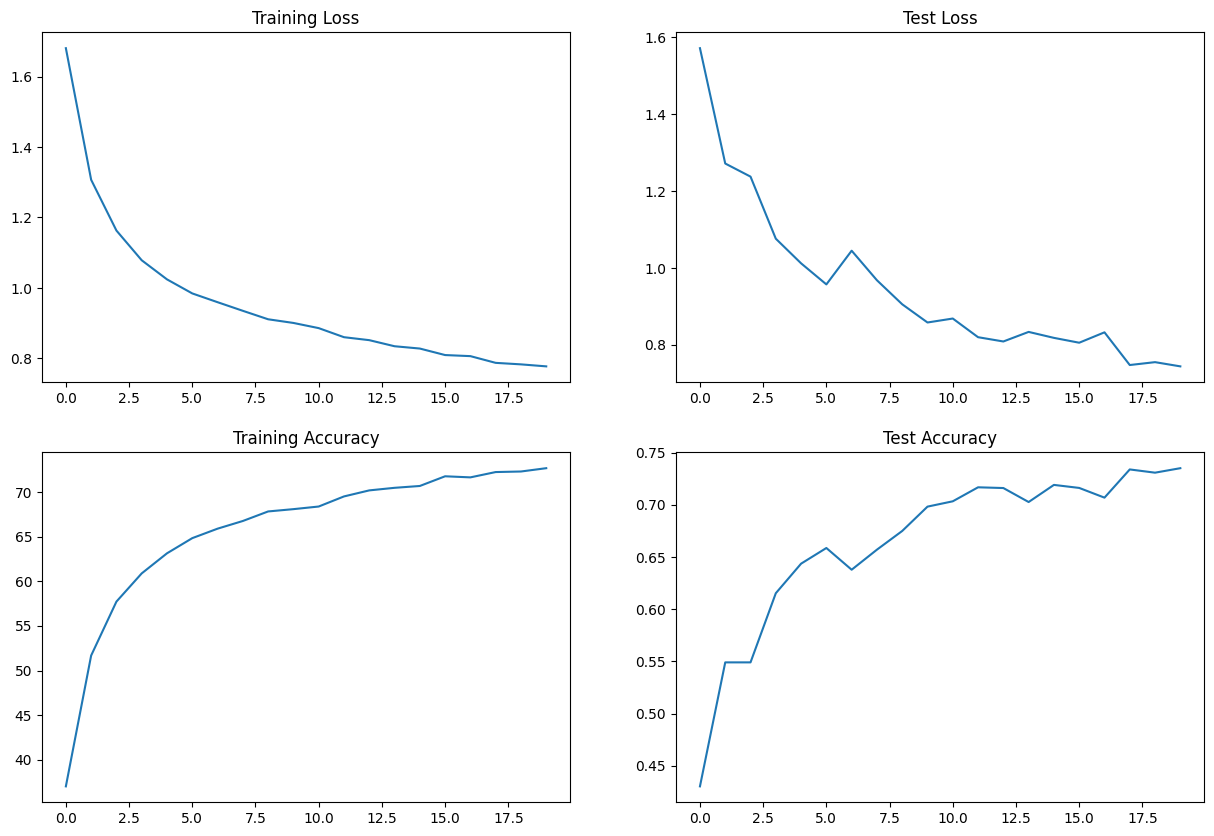

In [10]:
t = train_losses
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_list)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc_list)
axs[1, 1].set_title("Test Accuracy")

In [18]:
# 10 misclassified images
misclassified_examples = []
misclassified_labels = []
correct_labels = []
total_misclassified =10

model_bn.eval()
with torch.no_grad():
  for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      output = model_bn(data)
      pred = output.argmax(dim=1, keepdim=True)

      ids_mask = ((pred == target.view_as(pred)) ==False).view(-1)
      misclassified_examples.append(data[ids_mask].squeeze().cpu().numpy())
      misclassified_labels.append(target[ids_mask].squeeze().cpu().numpy())
      correct_labels.append(pred[ids_mask].squeeze().cpu().numpy())

      if len(misclassified_examples[0]) >= 10:
        break

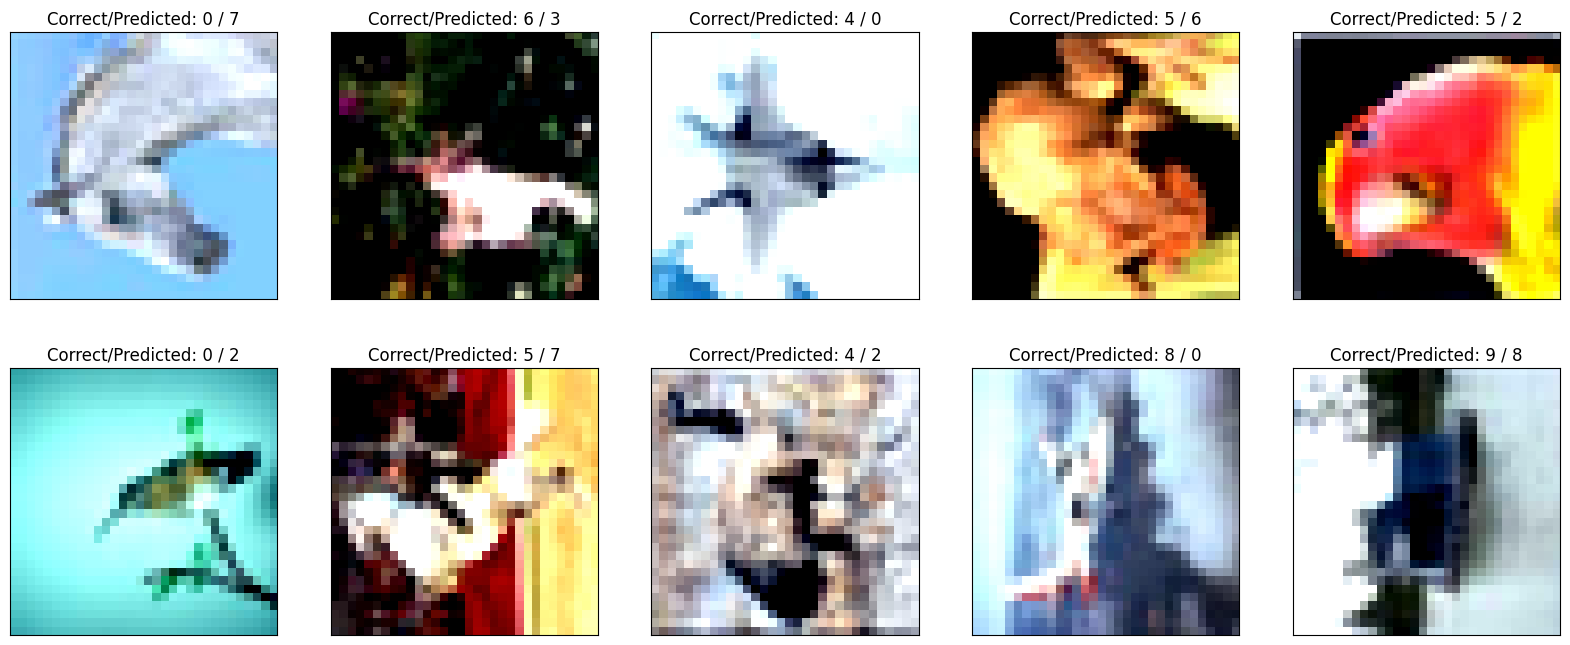

In [35]:
fig = plt.figure(figsize=(20,8))

for idx in np.arange(10):
  ax = fig.add_subplot(2,5,idx + 1,xticks=[],yticks=[])
  img = misclassified_examples[0][idx]
  img = img/2 + 0.5
  img = np.clip(img,0,1)
  plt.imshow(img.T)
  ax.set_title(f"Correct/Predicted: {correct_labels[0][idx]} / {misclassified_labels[0][idx]}")
plt.show()

###### LAYER NORM

In [11]:
train_losses = []
test_losses = []
train_acc_list = []
test_acc_list = []

model_ln =  model.Net(norm="LN").to(device)
optimizer = optim.SGD(model_ln.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_loss,train_acc = model.train(model_ln, device, train_loader, optimizer, epoch)
    train_losses.append(train_loss)
    train_acc_list.append(train_acc)


    test_loss,test_acc = model.test_accuracy = model.test(model_ln, device, test_loader)
    test_losses.append(test_loss)
    test_acc_list.append(test_acc)

EPOCH: 0


100%|██████████| 391/391 [00:23<00:00, 16.49it/s]

Training set set: Average loss: 1.9040, Accuracy: 13980/50000 (27.96%)



Test set: Average loss: 1.6522, Accuracy: 3730/10000 (37.30%)

EPOCH: 1


100%|██████████| 391/391 [00:28<00:00, 13.70it/s]

Training set set: Average loss: 1.5633, Accuracy: 21215/50000 (42.43%)



Test set: Average loss: 1.5110, Accuracy: 4498/10000 (44.98%)

EPOCH: 2


100%|██████████| 391/391 [00:25<00:00, 15.56it/s]

Training set set: Average loss: 1.3714, Accuracy: 25086/50000 (50.17%)



Test set: Average loss: 1.4078, Accuracy: 4956/10000 (49.56%)

EPOCH: 3


100%|██████████| 391/391 [00:23<00:00, 16.60it/s]

Training set set: Average loss: 1.2375, Accuracy: 27565/50000 (55.13%)



Test set: Average loss: 1.1942, Accuracy: 5719/10000 (57.19%)

EPOCH: 4


100%|██████████| 391/391 [00:25<00:00, 15.44it/s]

Training set set: Average loss: 1.1543, Accuracy: 29143/50000 (58.29%)



Test set: Average loss: 1.1943, Accuracy: 5768/10000 (57.68%)

EPOCH: 5


100%|██████████| 391/391 [00:23<00:00, 16.44it/s]

Training set set: Average loss: 1.0927, Accuracy: 30357/50000 (60.71%)



Test set: Average loss: 1.0553, Accuracy: 6201/10000 (62.01%)

EPOCH: 6


100%|██████████| 391/391 [00:25<00:00, 15.22it/s]

Training set set: Average loss: 1.0463, Accuracy: 31176/50000 (62.35%)



Test set: Average loss: 1.0034, Accuracy: 6453/10000 (64.53%)

EPOCH: 7


100%|██████████| 391/391 [00:23<00:00, 16.87it/s]

Training set set: Average loss: 1.0007, Accuracy: 32020/50000 (64.04%)



Test set: Average loss: 0.9826, Accuracy: 6447/10000 (64.47%)

EPOCH: 8


100%|██████████| 391/391 [00:27<00:00, 14.47it/s]

Training set set: Average loss: 0.9797, Accuracy: 32546/50000 (65.09%)



Test set: Average loss: 0.9523, Accuracy: 6644/10000 (66.44%)

EPOCH: 9


100%|██████████| 391/391 [00:23<00:00, 16.68it/s]

Training set set: Average loss: 0.9453, Accuracy: 33179/50000 (66.36%)



Test set: Average loss: 0.9291, Accuracy: 6702/10000 (67.02%)

EPOCH: 10


100%|██████████| 391/391 [00:23<00:00, 16.56it/s]

Training set set: Average loss: 0.9279, Accuracy: 33531/50000 (67.06%)



Test set: Average loss: 0.9772, Accuracy: 6575/10000 (65.75%)

EPOCH: 11


100%|██████████| 391/391 [00:21<00:00, 17.98it/s]

Training set set: Average loss: 0.9013, Accuracy: 34004/50000 (68.01%)



Test set: Average loss: 0.9119, Accuracy: 6786/10000 (67.86%)

EPOCH: 12


100%|██████████| 391/391 [00:22<00:00, 17.48it/s]

Training set set: Average loss: 0.8865, Accuracy: 34229/50000 (68.46%)



Test set: Average loss: 0.8420, Accuracy: 6991/10000 (69.91%)

EPOCH: 13


100%|██████████| 391/391 [00:23<00:00, 16.77it/s]

Training set set: Average loss: 0.8603, Accuracy: 34781/50000 (69.56%)



Test set: Average loss: 0.7962, Accuracy: 7172/10000 (71.72%)

EPOCH: 14


100%|██████████| 391/391 [00:23<00:00, 16.68it/s]

Training set set: Average loss: 0.8425, Accuracy: 35157/50000 (70.31%)



Test set: Average loss: 0.8580, Accuracy: 6975/10000 (69.75%)

EPOCH: 15


100%|██████████| 391/391 [00:23<00:00, 16.75it/s]

Training set set: Average loss: 0.8321, Accuracy: 35314/50000 (70.63%)



Test set: Average loss: 0.8237, Accuracy: 7133/10000 (71.33%)

EPOCH: 16


100%|██████████| 391/391 [00:22<00:00, 17.05it/s]

Training set set: Average loss: 0.8160, Accuracy: 35573/50000 (71.15%)



Test set: Average loss: 0.7918, Accuracy: 7214/10000 (72.14%)

EPOCH: 17


100%|██████████| 391/391 [00:22<00:00, 17.53it/s]

Training set set: Average loss: 0.8019, Accuracy: 35768/50000 (71.54%)



Test set: Average loss: 0.7615, Accuracy: 7354/10000 (73.54%)

EPOCH: 18


100%|██████████| 391/391 [00:22<00:00, 17.16it/s]

Training set set: Average loss: 0.7870, Accuracy: 36142/50000 (72.28%)



Test set: Average loss: 0.7805, Accuracy: 7292/10000 (72.92%)

EPOCH: 19


100%|██████████| 391/391 [00:23<00:00, 16.32it/s]

Training set set: Average loss: 0.7832, Accuracy: 36243/50000 (72.49%)



Test set: Average loss: 0.7181, Accuracy: 7474/10000 (74.74%)



Text(0.5, 1.0, 'Test Accuracy')

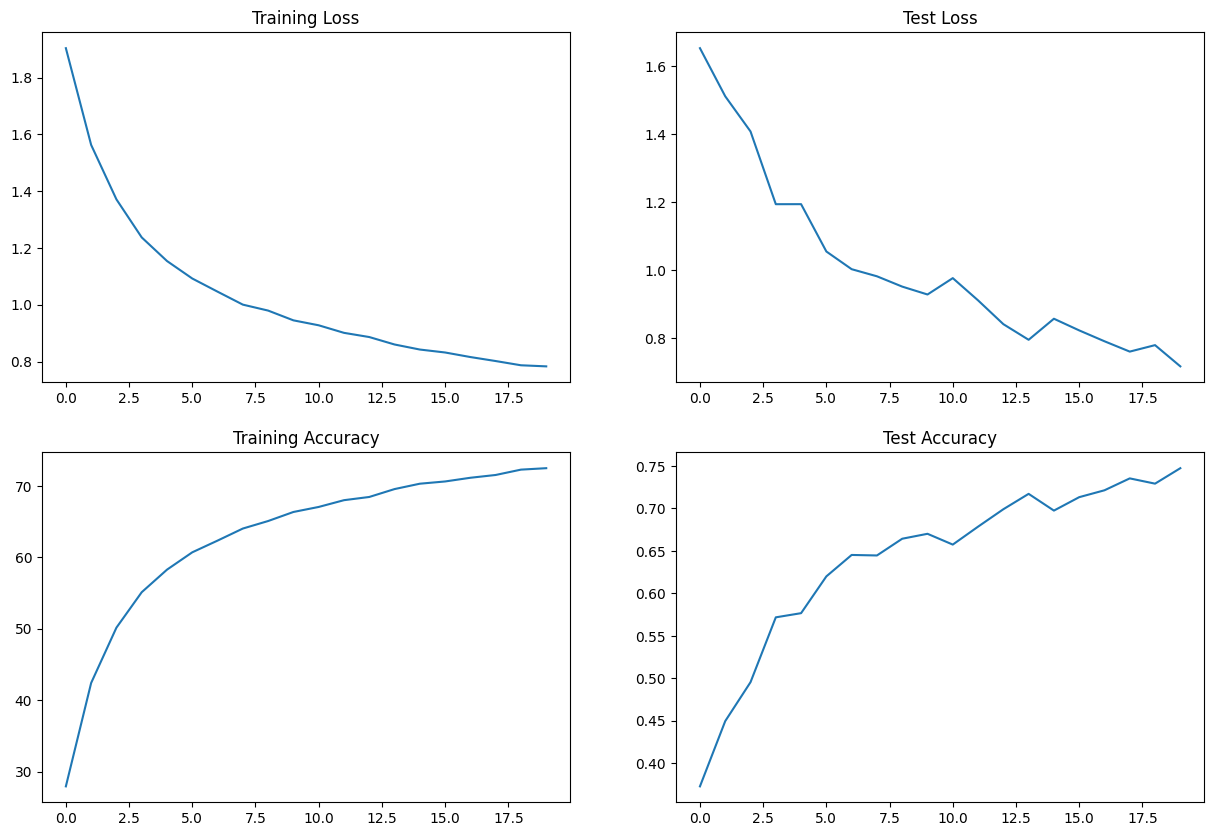

In [12]:
t = t = train_losses
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_list)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc_list)
axs[1, 1].set_title("Test Accuracy")

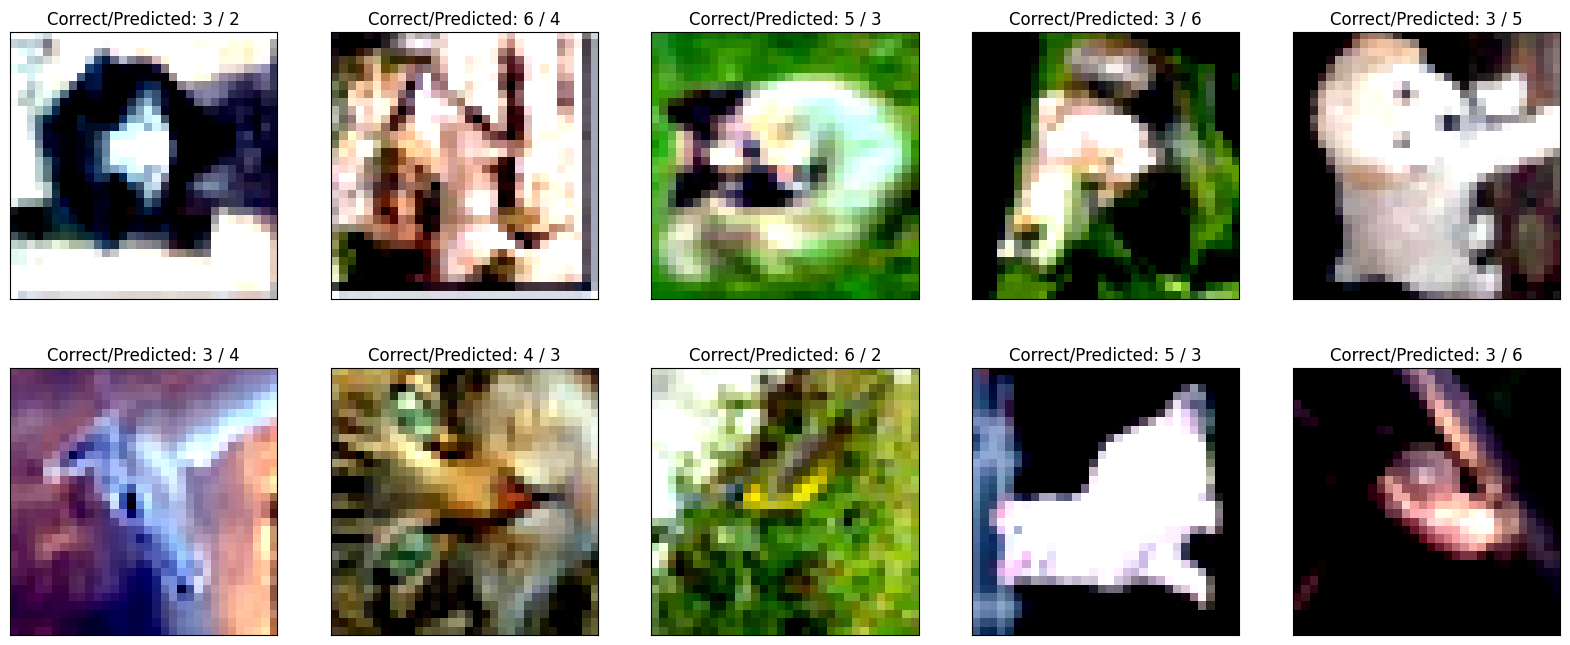

In [36]:
# 10 misclassified images
misclassified_examples = []
misclassified_labels = []
correct_labels = []
total_misclassified =10

model_ln.eval()
with torch.no_grad():
  for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      output = model_ln(data)
      pred = output.argmax(dim=1, keepdim=True)

      ids_mask = ((pred == target.view_as(pred)) ==False).view(-1)
      misclassified_examples.append(data[ids_mask].squeeze().cpu().numpy())
      misclassified_labels.append(target[ids_mask].squeeze().cpu().numpy())
      correct_labels.append(pred[ids_mask].squeeze().cpu().numpy())

      if len(misclassified_examples[0]) >= 10:
        break

fig = plt.figure(figsize=(20,8))

for idx in np.arange(10):
  ax = fig.add_subplot(2,5,idx + 1,xticks=[],yticks=[])
  img = misclassified_examples[0][idx]
  img = img/2 + 0.5
  img = np.clip(img,0,1)
  plt.imshow(img.T)
  ax.set_title(f"Correct/Predicted: {correct_labels[0][idx]} / {misclassified_labels[0][idx]}")
plt.show()

###### GROUP NORM

In [13]:
train_losses = []
test_losses = []
train_acc_list = []
test_acc_list = []

model_gn =  model.Net(norm="GN").to(device)
optimizer = optim.SGD(model_gn.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 20
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_loss,train_acc = model.train(model_gn, device, train_loader, optimizer, epoch)
    train_losses.append(train_loss)
    train_acc_list.append(train_acc)


    test_loss,test_acc = model.test_accuracy = model.test(model_gn, device, test_loader)
    test_losses.append(test_loss)
    test_acc_list.append(test_acc)

EPOCH: 0


100%|██████████| 391/391 [00:23<00:00, 16.35it/s]

Training set set: Average loss: 2.0245, Accuracy: 12316/50000 (24.63%)



Test set: Average loss: 1.7506, Accuracy: 3550/10000 (35.50%)

EPOCH: 1


100%|██████████| 391/391 [00:24<00:00, 16.08it/s]

Training set set: Average loss: 1.6816, Accuracy: 18948/50000 (37.90%)



Test set: Average loss: 1.5563, Accuracy: 4246/10000 (42.46%)

EPOCH: 2


100%|██████████| 391/391 [00:23<00:00, 16.37it/s]

Training set set: Average loss: 1.4744, Accuracy: 22949/50000 (45.90%)



Test set: Average loss: 1.4615, Accuracy: 4659/10000 (46.59%)

EPOCH: 3


100%|██████████| 391/391 [00:22<00:00, 17.48it/s]

Training set set: Average loss: 1.3262, Accuracy: 25936/50000 (51.87%)



Test set: Average loss: 1.2966, Accuracy: 5267/10000 (52.67%)

EPOCH: 4


100%|██████████| 391/391 [00:29<00:00, 13.10it/s]

Training set set: Average loss: 1.2348, Accuracy: 27664/50000 (55.33%)



Test set: Average loss: 1.2573, Accuracy: 5491/10000 (54.91%)

EPOCH: 5


100%|██████████| 391/391 [00:27<00:00, 14.25it/s]

Training set set: Average loss: 1.1625, Accuracy: 29240/50000 (58.48%)



Test set: Average loss: 1.1688, Accuracy: 5818/10000 (58.18%)

EPOCH: 6


100%|██████████| 391/391 [00:24<00:00, 16.23it/s]

Training set set: Average loss: 1.1124, Accuracy: 30090/50000 (60.18%)



Test set: Average loss: 1.0867, Accuracy: 6081/10000 (60.81%)

EPOCH: 7


100%|██████████| 391/391 [00:24<00:00, 16.23it/s]

Training set set: Average loss: 1.0688, Accuracy: 30853/50000 (61.71%)



Test set: Average loss: 1.1259, Accuracy: 5991/10000 (59.91%)

EPOCH: 8


100%|██████████| 391/391 [00:22<00:00, 17.16it/s]

Training set set: Average loss: 1.0380, Accuracy: 31418/50000 (62.84%)



Test set: Average loss: 1.0327, Accuracy: 6323/10000 (63.23%)

EPOCH: 9


100%|██████████| 391/391 [00:22<00:00, 17.48it/s]

Training set set: Average loss: 1.0037, Accuracy: 32191/50000 (64.38%)



Test set: Average loss: 1.0187, Accuracy: 6337/10000 (63.37%)

EPOCH: 10


100%|██████████| 391/391 [00:22<00:00, 17.44it/s]

Training set set: Average loss: 0.9850, Accuracy: 32473/50000 (64.95%)



Test set: Average loss: 1.0710, Accuracy: 6283/10000 (62.83%)

EPOCH: 11


100%|██████████| 391/391 [00:23<00:00, 16.70it/s]

Training set set: Average loss: 0.9616, Accuracy: 32807/50000 (65.61%)



Test set: Average loss: 0.9496, Accuracy: 6672/10000 (66.72%)

EPOCH: 12


100%|██████████| 391/391 [00:23<00:00, 16.45it/s]

Training set set: Average loss: 0.9392, Accuracy: 33314/50000 (66.63%)



Test set: Average loss: 0.9631, Accuracy: 6620/10000 (66.20%)

EPOCH: 13


100%|██████████| 391/391 [00:24<00:00, 15.76it/s]

Training set set: Average loss: 0.9201, Accuracy: 33720/50000 (67.44%)



Test set: Average loss: 0.9221, Accuracy: 6714/10000 (67.14%)

EPOCH: 14


100%|██████████| 391/391 [00:23<00:00, 16.48it/s]

Training set set: Average loss: 0.9069, Accuracy: 33849/50000 (67.70%)



Test set: Average loss: 0.8492, Accuracy: 7021/10000 (70.21%)

EPOCH: 15


100%|██████████| 391/391 [00:26<00:00, 14.80it/s]

Training set set: Average loss: 0.8862, Accuracy: 34365/50000 (68.73%)



Test set: Average loss: 0.8739, Accuracy: 6881/10000 (68.81%)

EPOCH: 16


100%|██████████| 391/391 [00:29<00:00, 13.32it/s]

Training set set: Average loss: 0.8699, Accuracy: 34650/50000 (69.30%)



Test set: Average loss: 0.8413, Accuracy: 7020/10000 (70.20%)

EPOCH: 17


100%|██████████| 391/391 [00:25<00:00, 15.07it/s]

Training set set: Average loss: 0.8677, Accuracy: 34662/50000 (69.32%)



Test set: Average loss: 0.8317, Accuracy: 7059/10000 (70.59%)

EPOCH: 18


100%|██████████| 391/391 [00:26<00:00, 14.78it/s]

Training set set: Average loss: 0.8521, Accuracy: 34987/50000 (69.97%)



Test set: Average loss: 0.8429, Accuracy: 7066/10000 (70.66%)

EPOCH: 19


100%|██████████| 391/391 [00:28<00:00, 13.55it/s]

Training set set: Average loss: 0.8346, Accuracy: 35298/50000 (70.60%)



Test set: Average loss: 0.8487, Accuracy: 7043/10000 (70.43%)



Text(0.5, 1.0, 'Test Accuracy')

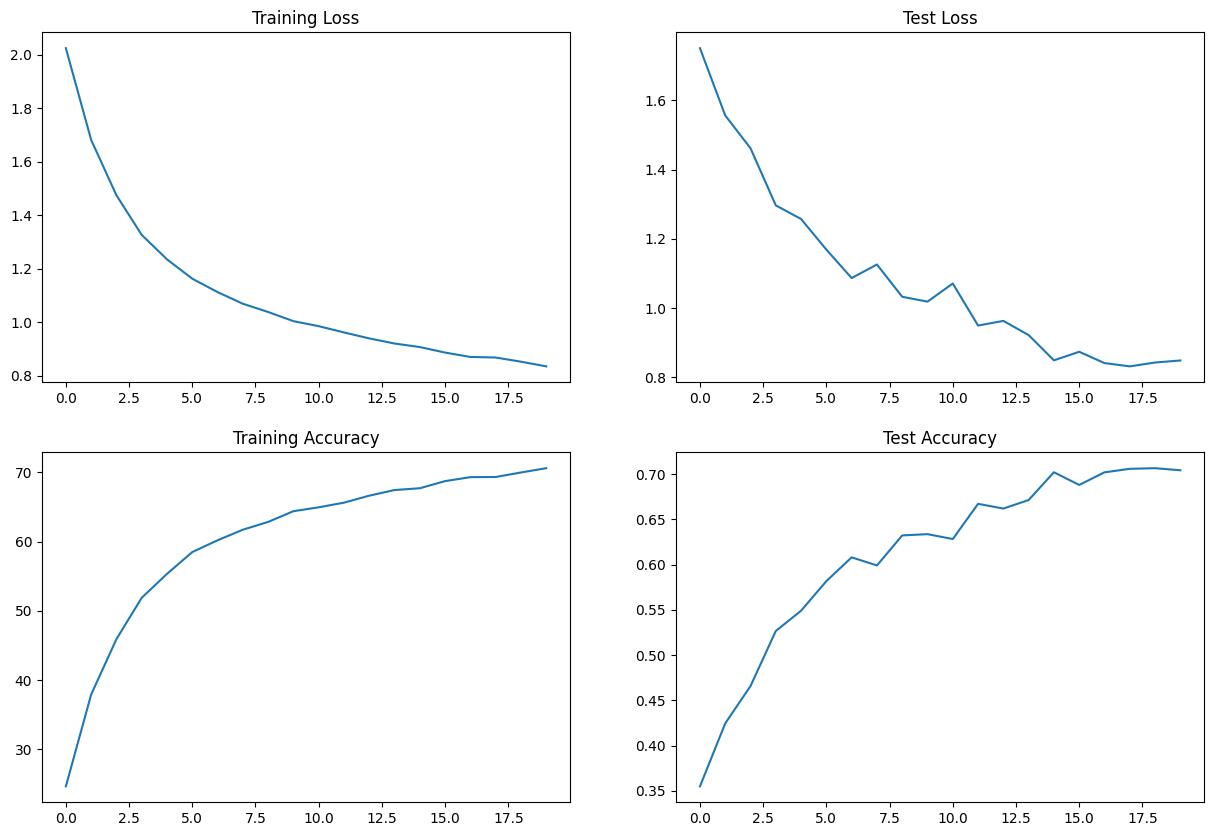

In [14]:
t = t = train_losses
%matplotlib inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(t)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc_list)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc_list)
axs[1, 1].set_title("Test Accuracy")

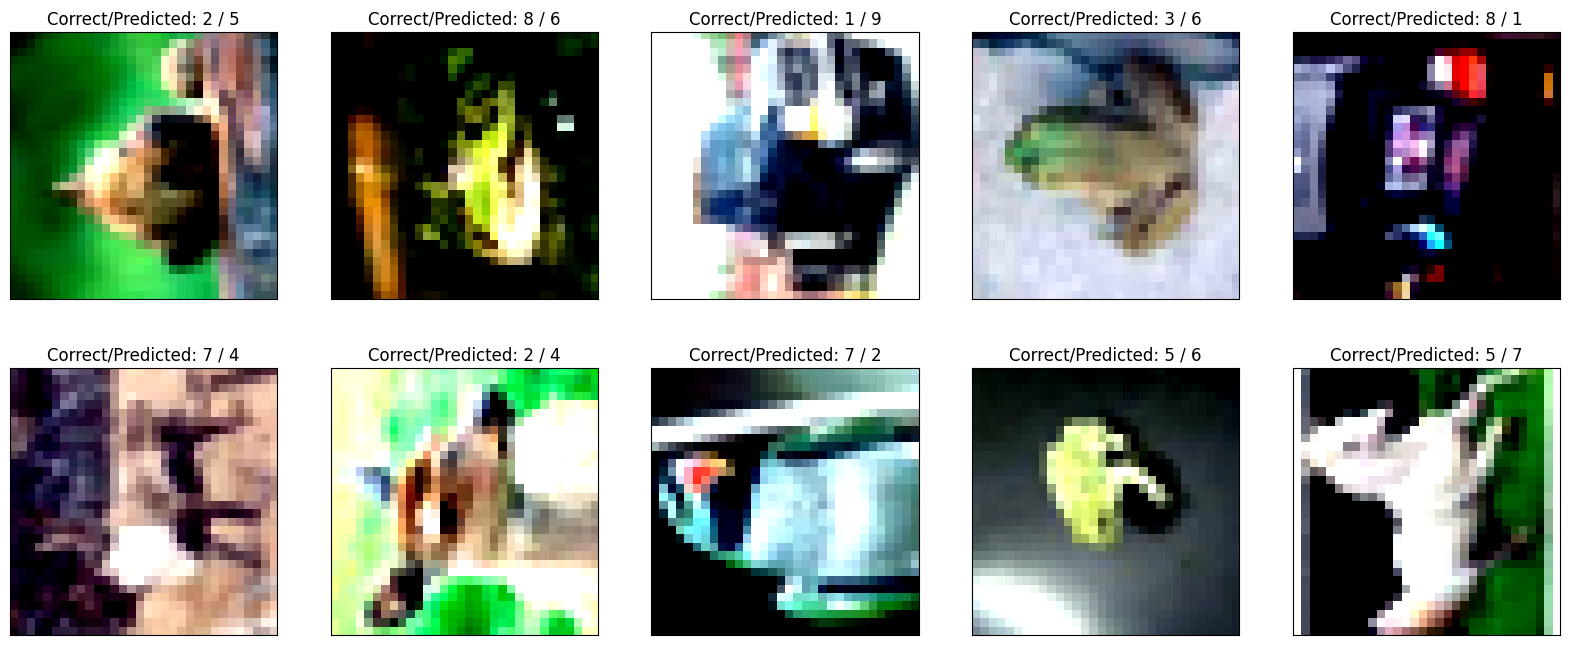

In [37]:
# 10 misclassified images
misclassified_examples = []
misclassified_labels = []
correct_labels = []
total_misclassified =10

model_gn.eval()
with torch.no_grad():
  for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      output = model_gn(data)
      pred = output.argmax(dim=1, keepdim=True)

      ids_mask = ((pred == target.view_as(pred)) ==False).view(-1)
      misclassified_examples.append(data[ids_mask].squeeze().cpu().numpy())
      misclassified_labels.append(target[ids_mask].squeeze().cpu().numpy())
      correct_labels.append(pred[ids_mask].squeeze().cpu().numpy())

      if len(misclassified_examples[0]) >= total_misclassified:
        break

fig = plt.figure(figsize=(20,8))
for idx in np.arange(10):
  ax = fig.add_subplot(2,5,idx + 1,xticks=[],yticks=[])
  img = misclassified_examples[0][idx]
  img = img/2 + 0.5
  img = np.clip(img,0,1)
  plt.imshow(img.T)
  ax.set_title(f"Correct/Predicted: {correct_labels[0][idx]} / {misclassified_labels[0][idx]}")
plt.show()